#####**Telecom Customer Churn Project**

**Objective**

The telecommunications industry is essential for global connectivity, enabling communication through voice, data, and internet services. In this highly competitive market, retaining customers is critical for telecom companies to maintain profitability and market share. Data science has become an indispensable tool in the telecommunications sector, allowing companies to analyze vast amounts of customer data to understand behavior, identify trends, and predict outcomes such as customer churn. By taking advantage of machine learning, telecom companies can proactively address potential churn, improving customer satisfaction and loyalty.

Customer churn is one of the biggest costs for any organization. Also known as customer turnover, it is the percentage of customers who stop using your company's product or service within a certain period of time.

In this project, we aim to find out the key indicators of churn and retention strategies that can be implemented to avoid the problem of a customer leaving the organization.

#####**Importing essential libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, r2_score, recall_score, classification_report, roc_auc_score, roc_curve, precision_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#####**Uploading dataset & understanding**

**Uploading dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSA Project/telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**OR**

In [ ]:
# Dataset file (google drive link) is attached in the project report. After downloading the file, uncomment the following steps and upload the file

# from google.colab import files
# uploaded = files.upload()

In [ ]:
# data = pd.read_csv('/content/telecom_customer_churn.csv')
# data.head()

Dataset size

In [ ]:
data.shape

(7043, 21)

Data columns/features

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Target variable ('Churn') distribution

In [ ]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Nowadays, the high cost of customer acquisition makes telecom operators encounter the “ceiling”, and even fall into the dilemma of customer acquisition. As market saturation increases, telecom operators need to solve the problem of increasing subscriber stickiness and prolonging subscriber life cycle. Therefore, it is crucial to analyse and predict the churn of telecom users.This dataset contains 21 columns, but the customer ID serves as a unique identifier for each customer and is not relevant to the data analysis, we focus on the remaining 20 fields, which include 19 input variables and 1 target variable. The target variable is a bifurcate variable representing whether a customer has churned.

#####**Data Cleaning & Preprocessing**

Removing unwanted unique columns

In [ ]:
data.drop(columns=['customerID'], axis=1, inplace=True)

Data Types

In [ ]:
data.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


'TotalCharges' column is given as object type. We need to convert the type to float.

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].dtype

dtype('float64')

**Checking nullvalues**

In [ ]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


After looking at the above output, we can say that there are 11 missing values for Total Charges. From the table we know that Total Charges is the product of Monthly Charges and its tenure. Let us replace these 11 rows through this mathematical equation.

Fixing null values in 'Total Charges'

In [ ]:
# Total charge = Tenure * Monthly Charge
# 'Tenure' and 'monthly charges' columns where 'total charges' is null
data[data['TotalCharges'].isnull()][['tenure', 'MonthlyCharges']]

,tenure,MonthlyCharges
488,0,52.55
753,0,20.25
936,0,80.85
1082,0,25.75
1340,0,56.05
3331,0,19.85
3826,0,25.35
4380,0,20.00
5218,0,19.70
6670,0,73.35


In [ ]:
# Fixing null values in 'total charges' column
data['TotalCharges'] = data['tenure'] * data['MonthlyCharges']
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Converting values of 'Senior Citizen' to string values

In [ ]:
data['SeniorCitizen'] = np.where(data.SeniorCitizen == 1, 'Yes', 'No')

Mapping Churn value

In [ ]:
churn_mapping = {'Yes': 1, 'No': 0}
data['Churn'] = data['Churn'].map(churn_mapping)

In [ ]:
data['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


Some categorical columns contains values like 'No internet service' and 'No phone service'. Technically it means 'No'. So the values is to be converted

In [ ]:
# converting 'No internet service' and 'No phone service' to 'No'
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service': 'No'})
data['OnlineSecurity'] = data['OnlineSecurity'].replace({'No internet service': 'No'})
data['OnlineBackup'] = data['OnlineBackup'].replace({'No internet service': 'No'})
data['DeviceProtection'] = data['DeviceProtection'].replace({'No internet service': 'No'})
data['TechSupport'] = data['TechSupport'].replace({'No internet service': 'No'})
data['StreamingTV'] = data['StreamingTV'].replace({'No internet service': 'No'})
data['StreamingMovies'] = data['StreamingMovies'].replace({'No internet service': 'No'})
data['StreamingMovies'] = data['StreamingMovies'].replace({'No internet service': 'No'})

In [ ]:
data.shape

(7043, 20)

Checking Duplicates

In [ ]:
data.duplicated().sum()

27

Checking outliers

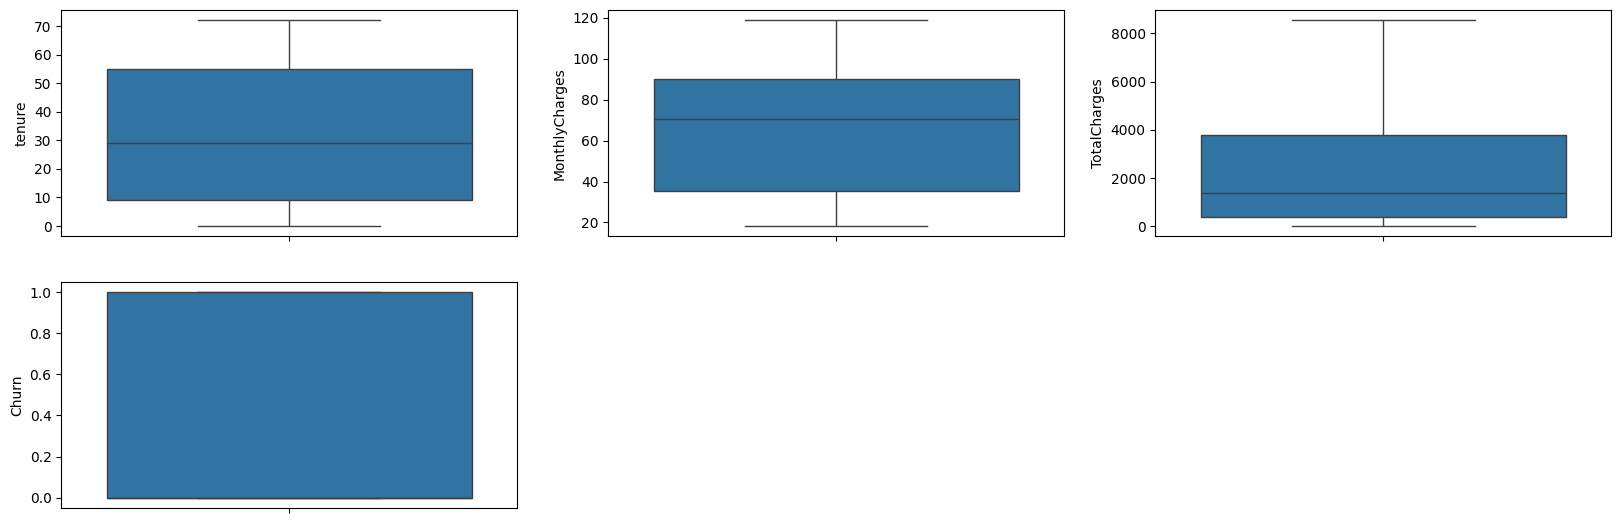

In [ ]:
outlier_columns = data.select_dtypes(exclude='object').columns

plt.figure(figsize=(20,10))
for i,col in enumerate(outlier_columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(data[col])
plt.show()

From the above boxplot we can conclude that there is no outliers in the data set

In [ ]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,1


In [ ]:
# Saving cleaned data
data.to_csv('/content/drive/MyDrive/DSA2/Project/cleaned_data.csv', index=False)

##### **Exploratory Data Analysis (EDA)**

In [ ]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,1


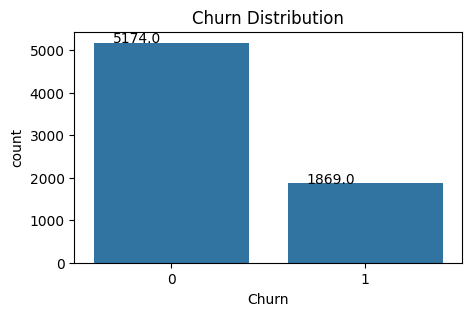

In [ ]:
# Churn Distribution
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Churn')
plt.title('Churn Distribution')
# show value count
for p in plt.gca().patches:
    plt.gca().annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+5))
plt.show()

This shows that the data is imbalanced. Churn 'Yes' be the minority class.
We need to balance before fitting it into model

Unique values in all categorical columns

In [ ]:
# Unique values in all categorical columns
cat_unique = data.select_dtypes(include='object').columns

for col in cat_unique:
  print(f"{col} : {data[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Distribution of numerical variables with respective of churn

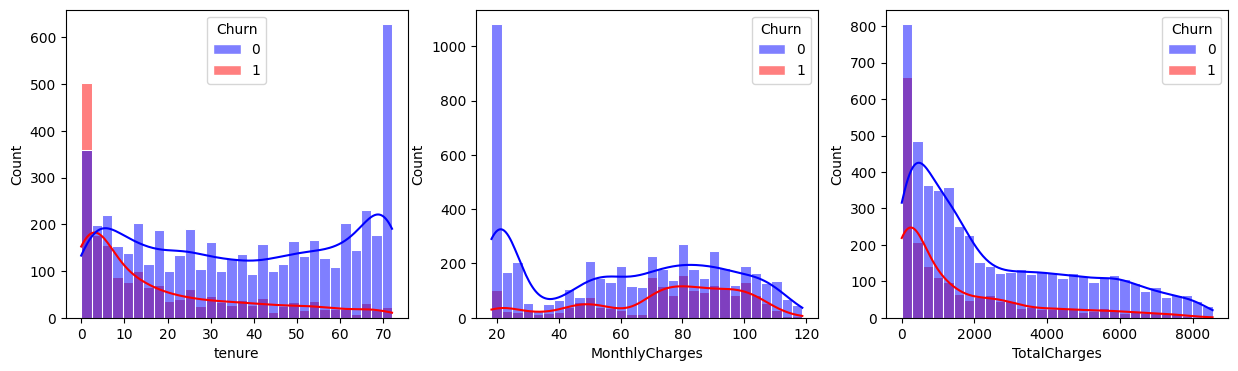

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
fig = sns.histplot(data = data, x='tenure',hue='Churn',kde=True,bins=30, edgecolor='white', palette=['blue', 'red'])

plt.subplot(1,3,2)
fig = sns.histplot(data= data, x='MonthlyCharges',hue='Churn',kde=True,bins=30, edgecolor='white', palette=['blue', 'red'])

plt.subplot(1,3,3)
fig = sns.histplot(data= data, x='TotalCharges',hue='Churn',kde=True,bins=30, edgecolor='white', palette=['blue', 'red'])

Univariate Analysis

Analysing categorical columns

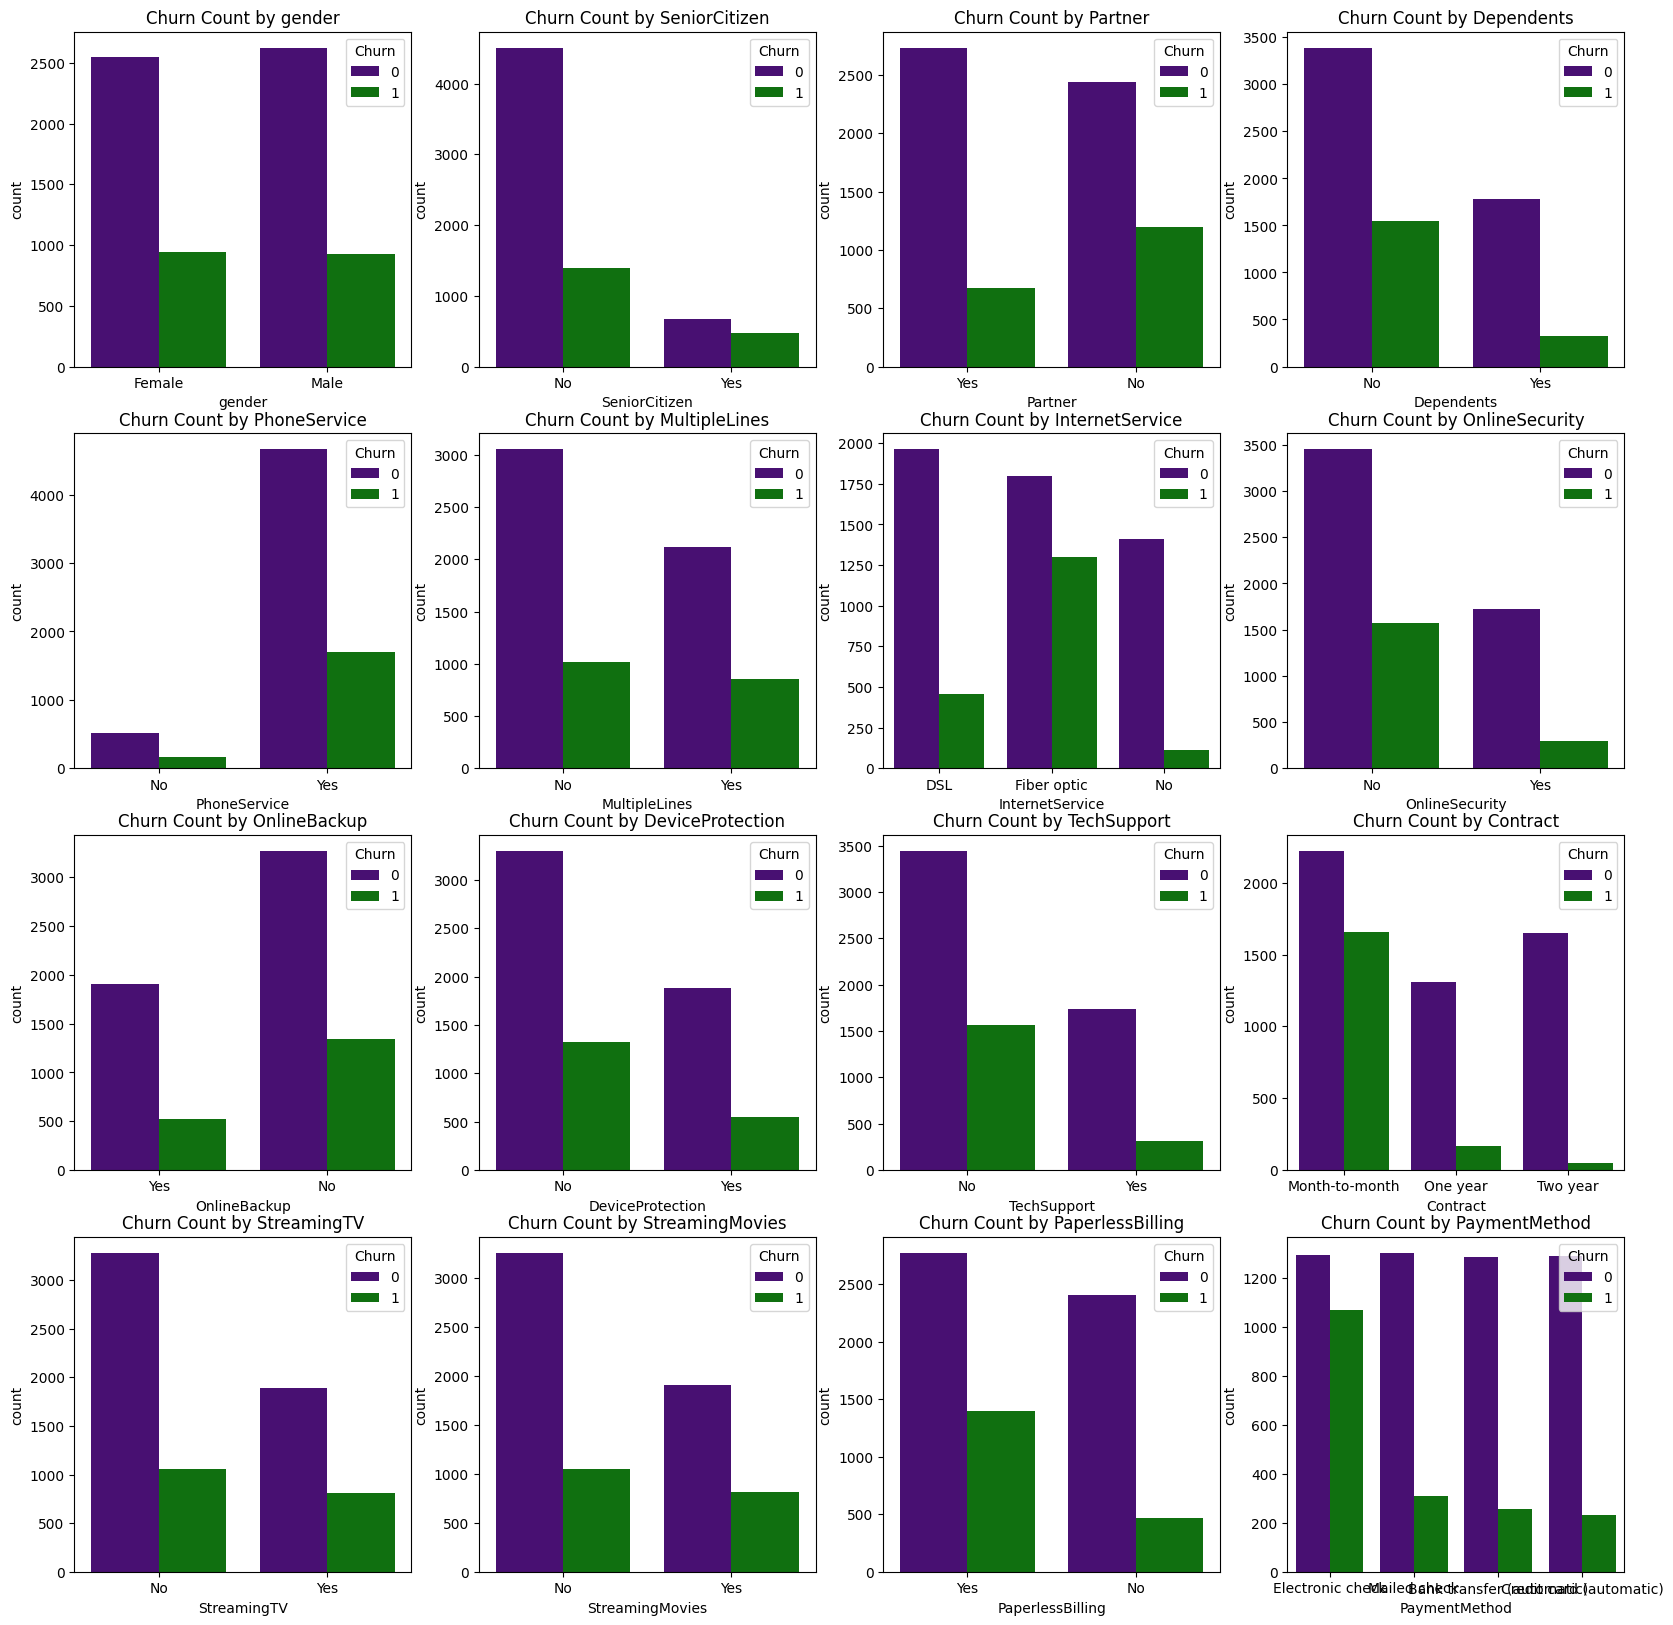

In [ ]:
num_unique = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_analysis_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'Contract','StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20,20))
for i,col in enumerate(cat_analysis_col):
  plt.subplot(4,4,i+1)
  sns.countplot(data=data, x=col, hue='Churn', palette=['indigo', 'green'])
  plt.title(f"Churn Count by {col}")
plt.show()

Correlation Analysis

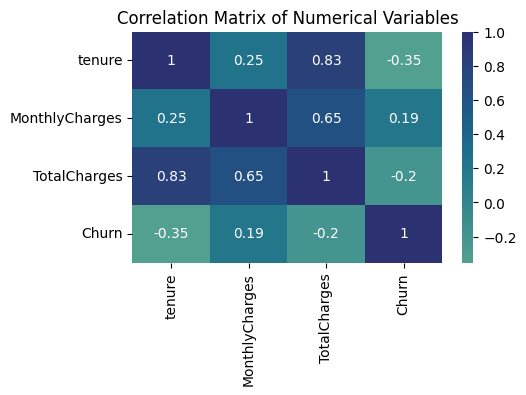

In [ ]:
corr_matrix = data[num_unique + ['Churn']].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='crest', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

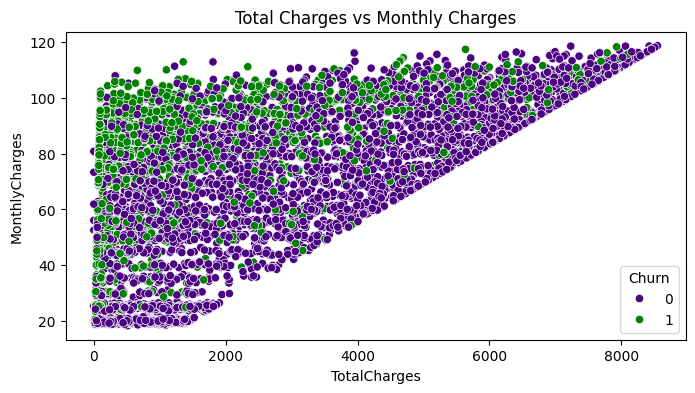

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='TotalCharges', y='MonthlyCharges', hue='Churn', palette=['indigo', 'green'])
plt.title('Total Charges vs Monthly Charges')
plt.show()

Creating a tenure bin to analyse the relationship of Churn rate with contract type

In [ ]:
data['tenure_group'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, np.inf], labels=['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years'])
data['tenure_group'].value_counts()

,count
tenure_group,
0-1 Year,2175
5+ Years,1407
1-2 Years,1024
2-3 Years,832
4-5 Years,832
3-4 Years,762


In [ ]:
data['tenure_group'].isna().sum()

11

In [ ]:
# show these rows
data[data['tenure_group'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,Female,No,Yes,Yes,0,No,No,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,0,NaN
753,Male,No,No,Yes,0,Yes,No,No,No,No,...,No,No,No,Two year,No,Mailed check,20.25,0.0,0,NaN
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,0,NaN
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,...,No,No,No,Two year,No,Mailed check,25.75,0.0,0,NaN
1340,Female,No,Yes,Yes,0,No,No,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,0,NaN
3331,Male,No,Yes,Yes,0,Yes,No,No,No,No,...,No,No,No,Two year,No,Mailed check,19.85,0.0,0,NaN
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,...,No,No,No,Two year,No,Mailed check,25.35,0.0,0,NaN
4380,Female,No,Yes,Yes,0,Yes,No,No,No,No,...,No,No,No,Two year,No,Mailed check,20.00,0.0,0,NaN
5218,Male,No,Yes,Yes,0,Yes,No,No,No,No,...,No,No,No,One year,Yes,Mailed check,19.70,0.0,0,NaN
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,0,NaN


In [ ]:
# Replacing NaN values
data['tenure_group'] = data['tenure_group'].fillna('5+ Years')

<ipython-input-41-bc5e948f07c6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_contract_tenure = data.groupby(['Contract', 'tenure_group'])['Churn'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

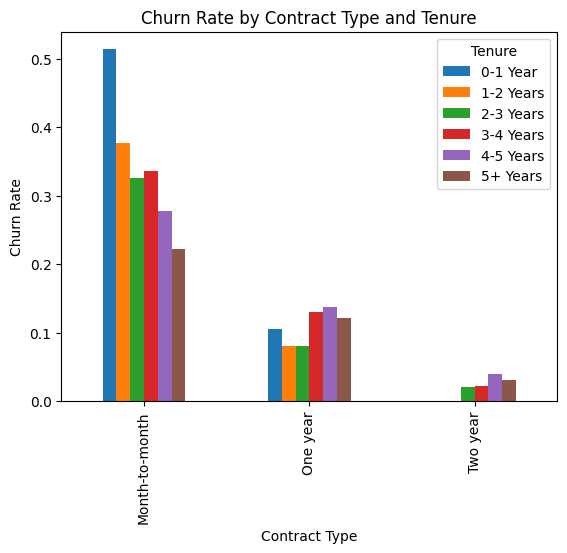

In [ ]:
# Find relation of Churn with Contract type
churn_by_contract_tenure = data.groupby(['Contract', 'tenure_group'])['Churn'].mean().unstack()

plt.figure(figsize=(10, 6))
churn_by_contract_tenure.plot(kind='bar', stacked=False)
plt.title('Churn Rate by Contract Type and Tenure')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.legend(title='Tenure')
plt.show()

In [ ]:
data.drop(columns=['tenure_group'], axis=1, inplace=True)

##### **Feature Engineering**

Splitting features into categorical and numerical columns

In [ ]:
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns

In [ ]:
print("Categorical columns :\n",cat_cols,"\n")
print("Numerical columns :\n",num_cols)

Categorical columns :
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object') 

Numerical columns :
 Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


Encoding Categorical Features

In [ ]:
# Label encoding categorical columns
le = LabelEncoder()
data_encoded = data.copy()
data_encoded[cat_cols] = data_encoded[cat_cols].apply(le.fit_transform)
data_encoded.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1936.30,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,107.70,1


In [ ]:
# dropping 'tenure', 'MonthlyCharges', 'TotalCharges' from data_encoded dataframe
data_encoded.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis=1, inplace=True)
data_encoded.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3


In [ ]:
# saving the model as pkl
import pickle
file1 = 'data_encoded.pkl'
with open(file1, 'wb') as f:
  pickle.dump(data_encoded, f)

Scaling Numerical Features

In [ ]:
ss = StandardScaler()
data_scaled = pd.DataFrame(ss.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']]), columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
data_scaled.head(3)

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.993448
1,0.066327,-0.259629,-0.151588
2,-1.236724,-0.362660,-0.959071


In [ ]:
# saving the model
file2 = 'data_scaled.pkl'
with open(file2, 'wb') as f:
  pickle.dump(data_scaled, f)

Concating encoded and scaled data

In [ ]:
enc_sc_data = pd.concat([data_encoded, data_scaled, data['Churn']], axis=1)
enc_sc_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,-1.277445,-1.160323,-0.993448,0
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0.066327,-0.259629,-0.151588,0
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,-1.236724,-0.362660,-0.959071,1


In [ ]:
enc_sc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int64  
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   int64  
 16  tenure            7043 non-null   float64


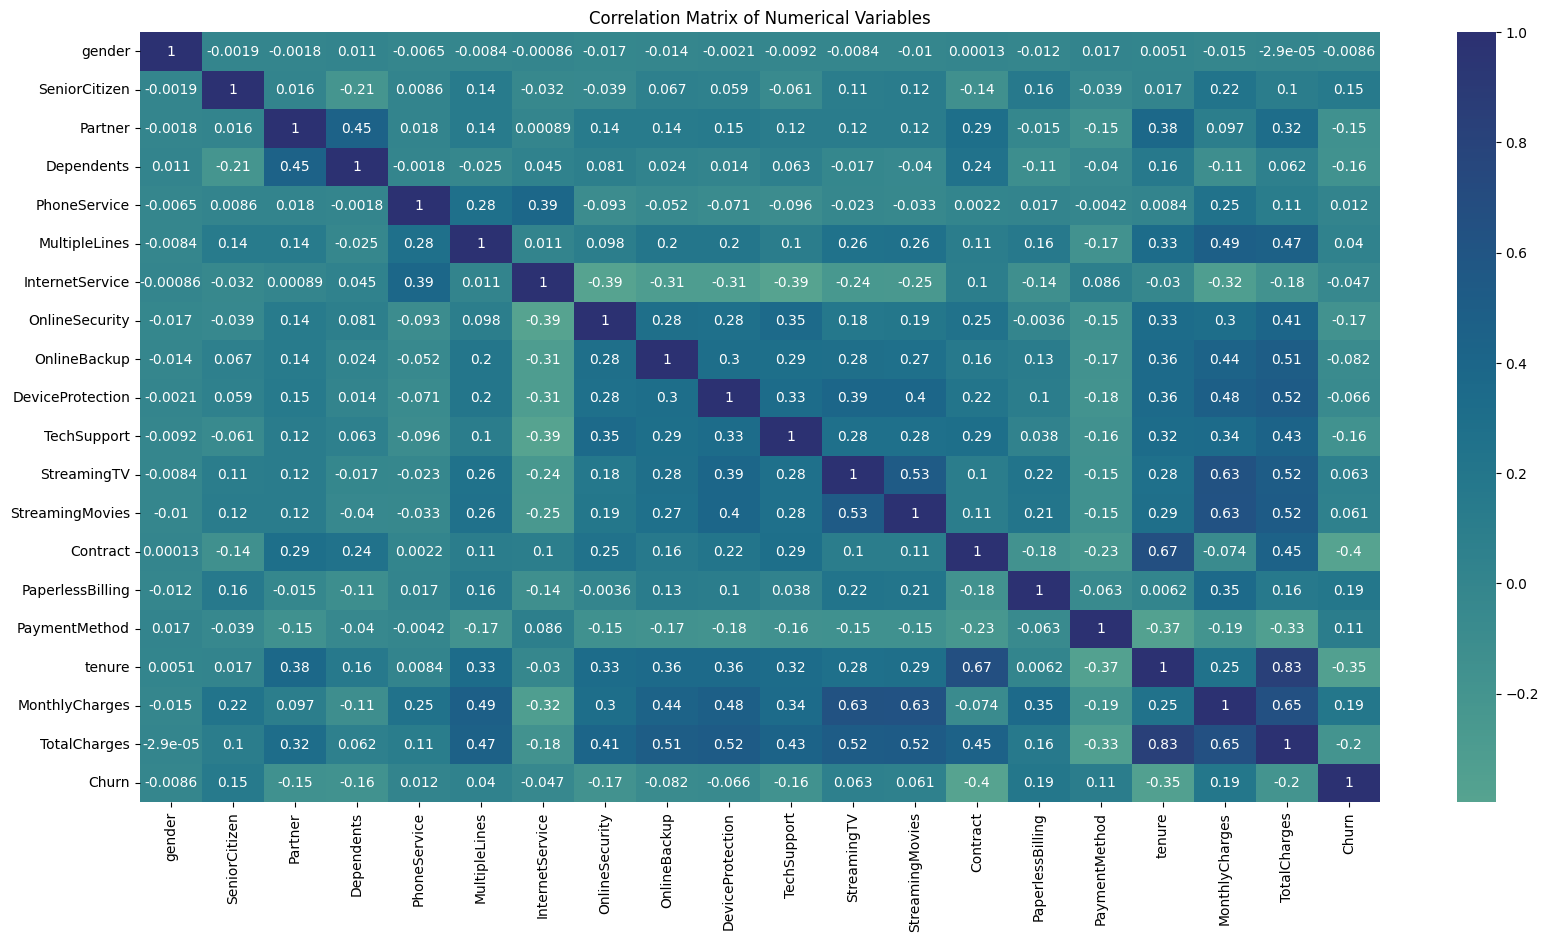

In [ ]:
# Correlation
corr_matrix = enc_sc_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='crest', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

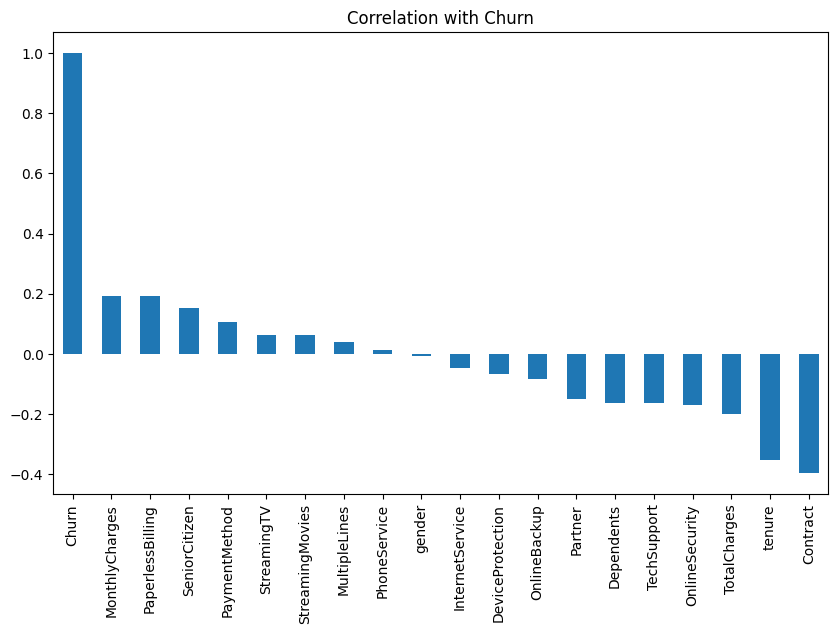

In [ ]:
plt.figure(figsize=(10,6))
enc_sc_data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with Churn')
plt.show()

'Total Charges' and 'tenure' features are highly correlated. So 'Total Charges' can be dropped

In [ ]:
enc_sc_data.drop(columns=['TotalCharges'], axis=1, inplace=True)

Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest

x_ft = enc_sc_data.drop(columns=['Churn'], axis=1)
y_ft = enc_sc_data['Churn']

selector = SelectKBest(k=10)
selector.fit(x_ft, y_ft)

selected_features = x_ft.columns[selector.get_support()]
print("Selected features :",selected_features)
selected_features.shape

Selected features : Index(['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'tenure', 'MonthlyCharges'],
      dtype='object')


(10,)

In [ ]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,1


In [ ]:
model_data = data[['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity',
       'TechSupport', 'Contract', 'PaperlessBilling', 'tenure',
       'MonthlyCharges', 'TotalCharges','Churn']]
model_data.head(3)

,SeniorCitizen,Partner,Dependents,OnlineSecurity,TechSupport,Contract,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,No,No,Month-to-month,Yes,1,29.85,29.85,0
1,No,No,No,Yes,No,One year,No,34,56.95,1936.30,0
2,No,No,No,Yes,No,Month-to-month,Yes,2,53.85,107.70,1


In [ ]:
# saving data
model_data.to_csv('/content/drive/MyDrive/DSA2/Project/Churn_Model_Data.csv', index=False)

Splitting data into target (y) and features (x)

In [ ]:
# split x and y from selected features
x = enc_sc_data[selected_features]
y = enc_sc_data['Churn']
x.shape, y.shape

((7043, 10), (7043,))

In [ ]:
#y = enc_sc_data['Churn']
#x = selected_features.drop(columns=['Churn'], axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority')
x1, y1 = x.copy(), y.copy()
x, y = smote.fit_resample(x, y)

In [ ]:
# churn valuecounts after resampling
y.value_counts()

,count
Churn,
0,5174
1,5174


Splitting data for training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8278, 10), (2070, 10), (8278,), (2070,))

In [ ]:
# before resampling
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((5634, 10), (1409, 10), (5634,), (1409,))

#####**Applying Machine Learning Modelling**

1.   Logistic Regression
2.   K-Nearest Neighbors (KNN)
3.   Random Forest Classifier
4.   Decision Tree Classifier
5.   Support Vector Machine (SVM)
6.   Gradient Descent Model
7.   XGB Classifier








**1.  Logistic Regression**

In [ ]:
log_model = LogisticRegression(random_state=42, solver = 'liblinear')
log_model.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
y_pred_log = log_model.predict(x_test)
y_pred_log_train = log_model.predict(x_train)
y_pred_log

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred_log))
lr_test_acc = accuracy_score(y_test, y_pred_log)
lr_train_acc = accuracy_score(y_train, y_pred_log_train)
print("Accuracy score (testing) :", lr_test_acc)
print("Accuracy score (training) :", lr_train_acc)
print("F1 score :",f1_score(y_test, y_pred_log))
print("R2 score :",r2_score(y_test, y_pred_log))
print("Recall score :",recall_score(y_test, y_pred_log))
print("Precision score :",precision_score(y_test, y_pred_log))
print("ROC AUC score :",roc_auc_score(y_test, y_pred_log))
print("Classification report :\n",classification_report(y_test, y_pred_log))

Confusion matrix :
 [[755 266]
 [186 863]]
Accuracy score (testing) : 0.7816425120772947
Accuracy score (training) : 0.7655230732060885
F1 score : 0.7924701561065198
R2 score : 0.12641020924736834
Recall score : 0.8226882745471878
Precision score : 0.7643932683790965
ROC AUC score : 0.7810796906526342
Classification report :
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      1021
           1       0.76      0.82      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



**2.  K-Nearest Neighbors (KNN)**

In [ ]:
metric_k = []
neighbors = np.arange(1,25)

for k in neighbors:
  knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  knn_model.fit(x_train, y_train)
  y_pred_knn = knn_model.predict(x_test)
  knn_accuracy = accuracy_score(y_test, y_pred_knn)
  metric_k.append(knn_accuracy)

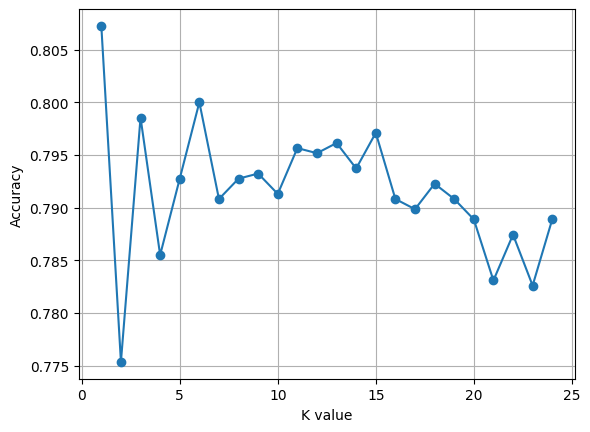

In [ ]:
plt.plot(neighbors, metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors=11, metric='minkowski')
knn_class.fit(x_train, y_train)
knn_pred = knn_class.predict(x_test)
knn_pred_train = knn_class.predict(x_train)
print("Confusion matrix :\n", confusion_matrix(y_test, knn_pred))
knn_acc_test = accuracy_score(y_test, knn_pred)
knn_acc_train = accuracy_score(y_train, knn_pred_train)
print("Accuracy Score (testing) :",accuracy_score(y_test, knn_pred))
print("Accuracy Score (training) :",accuracy_score(y_train, knn_pred_train))
print("F1 score :",f1_score(y_test, knn_pred))
print("R2 score :",r2_score(y_test, knn_pred))
print("Recall score :",recall_score(y_test, knn_pred))
print("Precision score :",precision_score(y_test, knn_pred))
print("ROC AUC score :",roc_auc_score(y_test, knn_pred))
print("Classification report :\n",classification_report(y_test, knn_pred))

Confusion matrix :
 [[728 293]
 [130 919]]
Accuracy Score (testing) : 0.7956521739130434
Accuracy Score (training) : 0.8149311427881131
F1 score : 0.8129146395400265
R2 score : 0.18245911175140883
Recall score : 0.8760724499523356
Precision score : 0.7582508250825083
ROC AUC score : 0.7945494473072158
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.71      0.77      1021
           1       0.76      0.88      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.80      0.79      2070



**3.  Random Forest Classifier**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred_rf))
rfc_acc_test = accuracy_score(y_test, y_pred_rf)
rfc_acc_train = accuracy_score(y_train, y_pred_rf_train)
print("Accuracy score (testing) :", rfc_acc_test)
print("Accuracy score (training) :", rfc_acc_train)
print("F1 score :",f1_score(y_test, y_pred_rf))
print("R2 score :",r2_score(y_test, y_pred_rf))
print("Recall score :",recall_score(y_test, y_pred_rf))
print("Precision score :",precision_score(y_test, y_pred_rf))
print("ROC AUC score :",roc_auc_score(y_test, y_pred_rf))
print("Classification report :\n",classification_report(y_test, y_pred_rf))
print("Mean squared error :",mean_squared_error(y_test, y_pred_rf))
# RMSE
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Confusion matrix :
 [[825 196]
 [153 896]]
Accuracy score (testing) : 0.8314009661835748
Accuracy score (training) : 0.997704759603769
F1 score : 0.836992059785147
R2 score : 0.32548044917551233
Recall score : 0.8541468064823642
Precision score : 0.8205128205128205
ROC AUC score : 0.8310890741520538
Classification report :
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1021
           1       0.82      0.85      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

Mean squared error : 0.16859903381642513
Root mean squared error : 0.4106081268270577


**4.  Decision Tree Classifier**

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(x_test)
y_pred_dt_train = dt_model.predict(x_train)
y_pred_dt

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred_dt))
dt_acc_test = accuracy_score(y_test, y_pred_dt)
dt_acc_train = accuracy_score(y_train, y_pred_dt_train)
print("Accuracy score (testing) :", dt_acc_test)
print("Accuracy score (training) :", dt_acc_train)
print("F1 score :",f1_score(y_test, y_pred_dt))
print("R2 score :",r2_score(y_test, y_pred_dt))
print("Recall score :",recall_score(y_test, y_pred_dt))
print("Precision score :",precision_score(y_test, y_pred_dt))
print("ROC AUC score :",roc_auc_score(y_test, y_pred_dt))
print("Classification report :\n",classification_report(y_test, y_pred_dt))

Confusion matrix :
 [[785 236]
 [237 812]]
Accuracy score (testing) : 0.7714975845410628
Accuracy score (training) : 0.997704759603769
F1 score : 0.7744396757272293
R2 score : 0.08582307295133895
Recall score : 0.7740705433746425
Precision score : 0.7748091603053435
ROC AUC score : 0.7714623040085751
Classification report :
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1021
           1       0.77      0.77      0.77      1049

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



**5.  Support Vector Machine (SVM)**

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(x_test)
y_pred_svm_train = svm_model.predict(x_train)
y_pred_svm

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred_svm))
svm_acc_test = accuracy_score(y_test, y_pred_svm)
svm_acc_train = accuracy_score(y_train, y_pred_svm_train)
print("Accuracy score (testing) :", svm_acc_test)
print("Accuracy score (training) :",svm_acc_train)
print("F1 score :",f1_score(y_test, y_pred_svm))
print("R2 score :",r2_score(y_test, y_pred_svm))
print("Recall score :",recall_score(y_test, y_pred_svm))
print("Precision score :",precision_score(y_test, y_pred_svm))
print("ROC AUC score :",roc_auc_score(y_test, y_pred_svm))
print("Classification report :\n",classification_report(y_test, y_pred_svm))

Confusion matrix :
 [[708 313]
 [148 901]]
Accuracy score (testing) : 0.7772946859903381
Accuracy score (training) : 0.7627446243053878
F1 score : 0.7962881131241716
R2 score : 0.10901572226335576
Recall score : 0.8589132507149666
Precision score : 0.7421746293245469
ROC AUC score : 0.7761755283937223
Classification report :
               precision    recall  f1-score   support

           0       0.83      0.69      0.75      1021
           1       0.74      0.86      0.80      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



**6.  Gradient Descent Model**

In [ ]:
gd_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gd_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gd = gd_model.predict(x_test)
y_pred_gd_train = gd_model.predict(x_train)
y_pred_gd

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred_gd))
gdm_acc_test = accuracy_score(y_test, y_pred_gd)
gdm_acc_train = accuracy_score(y_train, y_pred_gd_train)
print("Accuracy score (testing) :", gdm_acc_test)
print("Accuracy score (training) :",gdm_acc_train)
print("F1 score :",f1_score(y_test, y_pred_gd))
print("R2 score :",r2_score(y_test, y_pred_gd))
print("Recall score :",recall_score(y_test, y_pred_gd))
print("Precision score :",precision_score(y_test, y_pred_gd))
print("ROC AUC score :",roc_auc_score(y_test, y_pred_gd))
print("Classification report :\n",classification_report(y_test, y_pred_gd))

Confusion matrix :
 [[766 255]
 [154 895]]
Accuracy score (testing) : 0.8024154589371981
Accuracy score (training) : 0.8026093259241363
F1 score : 0.8140063665302409
R2 score : 0.2095172026154284
Recall score : 0.8531935176358436
Precision score : 0.7782608695652173
ROC AUC score : 0.8017191878091069
Classification report :
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1021
           1       0.78      0.85      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



**7.  XGB Classifier**

In [ ]:
# from XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(x_test)
y_pred_xgb_train = xgb_model.predict(x_train)
y_pred_xgb

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
print("Confusion matrix :\n",confusion_matrix(y_test, y_pred_xgb))
xgb_acc_test = accuracy_score(y_test, y_pred_xgb)
xgb_acc_train = accuracy_score(y_train, y_pred_xgb_train)
print("Accuracy score (testing) :", xgb_acc_test)
print("Accuracy score (training) :",xgb_acc_train)
print("F1 score :",f1_score(y_test, y_pred_xgb))
print("R2 score :",r2_score(y_test, y_pred_xgb))
print("Recall score :",recall_score(y_test, y_pred_xgb))
print("Precision score :",precision_score(y_test, y_pred_xgb))
print("ROC AUC score :",roc_auc_score(y_test, y_pred_xgb))
print("Classification report :\n",classification_report(y_test, y_pred_xgb))

Confusion matrix :
 [[782 239]
 [132 917]]
Accuracy score (testing) : 0.8207729468599034
Accuracy score (training) : 0.8545542401546268
F1 score : 0.8317460317460318
R2 score : 0.28296059210348157
Recall score : 0.8741658722592945
Precision score : 0.7932525951557093
ROC AUC score : 0.8200408205566796
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      1021
           1       0.79      0.87      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



Model accuracies comparison

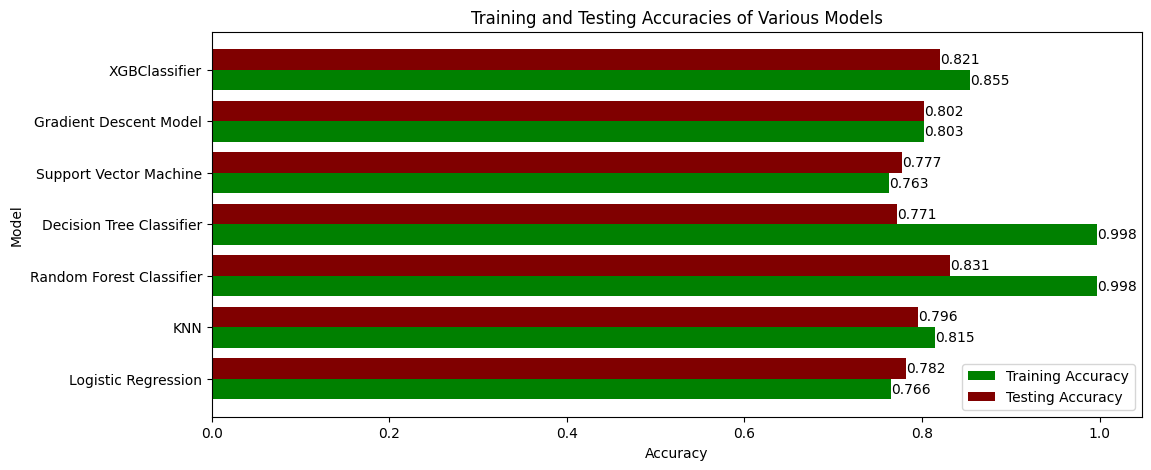

In [ ]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest Classifier',
               'Decision Tree Classifier', 'Support Vector Machine', 'Gradient Descent Model', 'XGBClassifier']

test_acc = [lr_test_acc, knn_acc_test, rfc_acc_test, dt_acc_test, svm_acc_test, gdm_acc_test, xgb_acc_test]
train_acc = [lr_train_acc, knn_acc_train, rfc_acc_train, dt_acc_train, svm_acc_train, gdm_acc_train, xgb_acc_train]

x = np.arange(len(model_names))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 5))

# Bar plot for training accuracy
train = ax.barh(x - width/2, train_acc, width, label='Training Accuracy', color='green')

# Bar plot for testing accuracy
test = ax.barh(x + width/2, test_acc, width, label='Testing Accuracy', color='maroon')

# Adding labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')
ax.set_title('Training and Testing Accuracies of Various Models')
ax.set_yticks(x)
ax.set_yticklabels(model_names)
ax.legend()

# # Add annotation to bars
for tr in train:
  plt.text(tr.get_width(), tr.get_y() + tr.get_height()/2, f'{tr.get_width():.3f}', ha='left', va='center', color='black')

for ts in test:
  plt.text(ts.get_width(), ts.get_y() + ts.get_height()/2, f'{ts.get_width():.3f}', ha='left', va='center', color='black')

plt.show()

In [ ]:
# predicting result
new_data = pd.DataFrame({"SeniorCitizen": ["No"], "Partner": ["No"], "Dependents": ["No"], "OnlineSecurity": ['Yes'],
                         "TechSupport": ["No"], "Contract": ["Month-to-month"], "PaperlessBilling": ["Yes"], "tenure": [2],
                         "MonthlyCharges": [53.85], "TotalCharges": [107.7]})

##### **Hyper Parameter Tuning**

**Logistic Regression**

Finding training accuracy and its variation with testing accuracy

In [ ]:
y_pred_log_test = log_model.predict(x_test)
y_pred_log_train = log_model.predict(x_train)
print("Training accuracy :",accuracy_score(y_train, y_pred_log_train))
print("Testing accuracy :",accuracy_score(y_test, y_pred_log_test))

diff_log = (accuracy_score(y_train, y_pred_log_train) - accuracy_score(y_test, y_pred_log_test))*100
print(f"Variation in training and testing accuracy :{abs(diff_log.round(3))}%")

Training accuracy : 0.7655230732060885
Testing accuracy : 0.7816425120772947
Variation in training and testing accuracy :1.612%


Hyperparameter Optimization using GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = log_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
# Analysing the best model

# Best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :',(grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\nEstimator that was chosen by the search :', (grid_search.best_estimator_))

GridSearch CV best score : 0.7653

Parameters that give the best results : {'C': 0.01}

Estimator that was chosen by the search : LogisticRegression(C=0.01, random_state=42, solver='liblinear')


In [ ]:
# Calculate GridSearch CV score on test set and train set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))
print('GridSearch CV score on train set: {0:0.4f}'.format(grid_search.score(x_train, y_train)))

GridSearch CV score on test set: 0.7802
GridSearch CV score on train set: 0.7656


**Random Forest**

In [ ]:
gs_rfc = GridSearchCV(estimator=rf_model,
                      param_grid={'n_estimators': list(range(50, 100, 10)),
                                  'criterion': ['gini', 'entropy', 'log_loss']},
                      scoring='accuracy',
                      cv=10,
                      verbose=0)

gs_rfc.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 60, 70, 80, 90]},
             scoring='accuracy')

In [ ]:
# Best fit
bf_rfc = gs_rfc.best_estimator_
bf_rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=42)

In [ ]:
print('GridSearch CV best score : {:.4f}\n'.format(gs_rfc.best_score_))
print('Parameters that give the best results :',(gs_rfc.best_params_))
print('\nEstimator that was chosen by the search :', (gs_rfc.best_estimator_))
print('Classification report : \n', classification_report(y_test, bf_rfc.predict(x_test)))

GridSearch CV best score : 0.8167

Parameters that give the best results : {'criterion': 'gini', 'n_estimators': 70}

Estimator that was chosen by the search : RandomForestClassifier(n_estimators=70, random_state=42)
Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1021
           1       0.83      0.86      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.84      0.83      0.83      2070
weighted avg       0.84      0.83      0.83      2070



In [ ]:
# Calculate GridSearch CV score on test set and train set

print('GridSearch CV score on test set: {0:0.4f}'.format(gs_rfc.score(x_test, y_test)))
print('GridSearch CV score on train set: {0:0.4f}'.format(gs_rfc.score(x_train, y_train)))

GridSearch CV score on test set: 0.8348
GridSearch CV score on train set: 0.9975


GridSearchCV shows criterion='entropy', n_estimators=80, random_state=42 gives the best accuracy.

But from the above analysis, we got slightly high accuracy when n_estimators = 100.


**XGB Classifier**

In [ ]:
xgb_param = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}


gs_xgb = GridSearchCV(estimator=xgb_model,
                      param_grid=xgb_param,
                      scoring='accuracy',
                      cv=10,
                      verbose=0)

gs_xgb.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [ ]:
# Best fit
bf_xgb = gs_xgb.best_estimator_
bf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
print('GridSearch CV best score : {:.4f}\n'.format(gs_xgb.best_score_))
print('Parameters that give the best results :',(gs_xgb.best_params_))
print('\nEstimator that was chosen by the search :', (gs_xgb.best_estimator_))
print('Classification report : \n', classification_report(y_test, bf_xgb.predict(x_test)))

GridSearch CV best score : 0.8100

Parameters that give the best results : {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.9}

Estimator that was chosen by the search : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Classification report : 
               precision    

In [ ]:
# Calculate GridSearch CV score on test set and train set

print('GridSearch CV score on test set: {0:0.4f}'.format(gs_xgb.score(x_test, y_test)))
print('GridSearch CV score on train set: {0:0.4f}'.format(gs_xgb.score(x_train, y_train)))

GridSearch CV score on test set: 0.8169
GridSearch CV score on train set: 0.8833


##### **Model Evaluation**

**Model Performance Summary**


| Model                     | Testing Accuracy | Training Accuracy | Precision | Recall | F1-Score | ROC-AUC | Notes                                                                                                                                                   |
|---------------------------|------------------|-------------------|-----------|--------|----------|---------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| Logistic Regression       | 78.16%           | 76.55%            | 76.4%     | 82.2%  | 79.2%    | 0.78    | Performs well on recall, indicating it's good at identifying positive cases but may have lower precision.                                               |
| K-Nearest Neighbors (KNN) | 79.5%            | 81.4%             | 75.8%     | 87.6%  | 81.3%    | 0.79    | Slight overfitting; performs well in recall and has a balanced F1-score.                                                                                 |
| Decision Tree Classifier  | 77.1%            | 99.7%             | 77.4%     | 77.4%  | 77.4%    | 0.77    | Significant overfitting; high training accuracy but much lower testing accuracy.                                                                         |
| Random Forest Classifier  | 83.1%            | 99.7%             | 82.05%    | 85.4%  | 83.6%    | 0.83    | High accuracy and F1-score; some overfitting due to a large gap between training and testing accuracy.                                                   |
| Support Vector Machine    | 77.7%            | 76.2%             | 74.2%     | 85.9%  | 79.6%    | 0.77    | Performs well in recall; lower precision, suggesting it may have more false positives.                                                                   |
| Gradient Boosting Model   | 80.2%            | 80.3%             | 77.8%     | 85.3%  | 81.4%    | 0.80    | Balanced performance with similar training and testing accuracy; good precision and recall balance.                                                     |
| XGBoost Classifier        | 82.1%            | 85.4%             | 79.3%     | 87.4%  | 81.4%    | 0.82    | Good all-around performance with high precision, recall, and F1-score.                                                              |

**Summary**
- **Random Forest Classifier** shows the highest testing accuracy and F1-score but has a significant overfitting issue.
- **XGBoost Classifier** provides a good balance between precision and recall, with relatively high accuracy and ROC-AUC.
- **Logistic Regression** and **Support Vector Machine** have decent performance with a focus on recall.
- **Decision Tree Classifier** has the most significant overfitting, indicated by the vast difference between training and testing accuracies.
- **Gradient Boosting Model** shows balanced performance with minimal overfitting, making it a strong candidate for reliable predictions.

ROC Curve of XGBClassifier

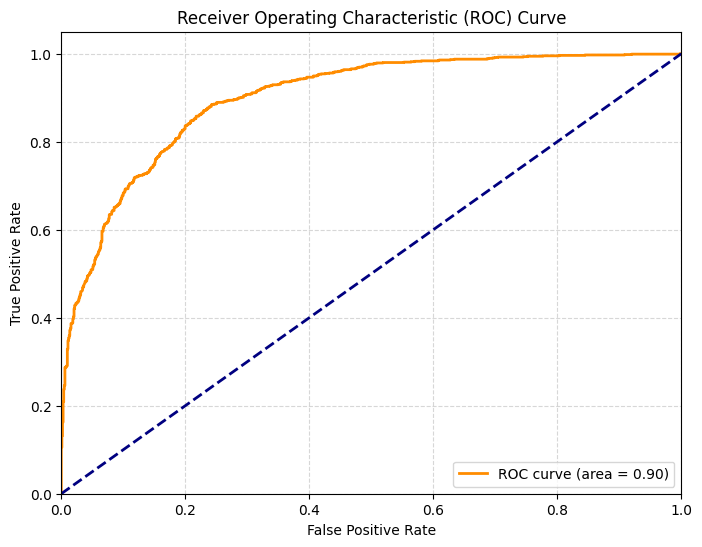

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Selecting the best model for model deployment**

In [ ]:
# saving pickle file
import pickle
filename = 'xgb_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))